In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
names=['sepal-length','sepal-width','petal-length','petal-width','Class']
dataset = pd.read_csv('./dl_pytorch/chap03/data/iris.data',names=names)

In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train = s.transform(X_train)
X_test = s.transform(X_test)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

타이타닉 데이터셋을 이용한 결정트리 예시

In [9]:
import pandas as pd
df = pd.read_csv('./dl_pytorch/chap03/data/titanic/train.csv',index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [10]:
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
df['Sex']=df['Sex'].map({'male':0,'female':1})
df = df.dropna() # N/A value 삭제
X = df.drop('Survived',axis=1) # survived column 제외
y = df['Survived']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8268156424581006

In [15]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test,y_predict),
    columns=['Predicted Not Survival','Predicted Survival'],
    index=['True Not Survival','True Survival'])

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,16,51


logistic regression 예시 - 새로운 숫자 예측하기

In [16]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


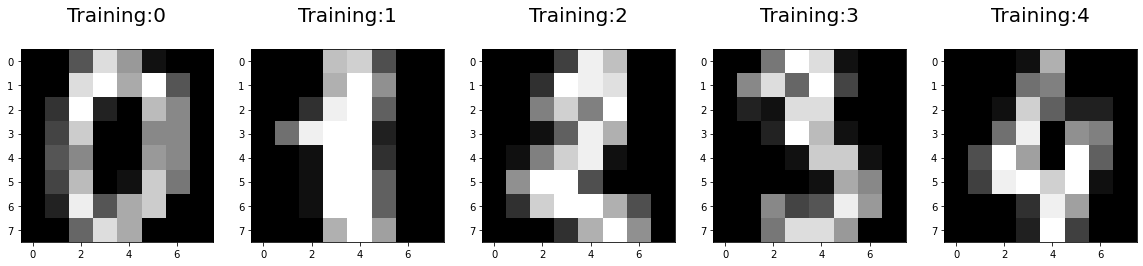

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training:%i\n'%label,fontsize=20)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\user\anaconda3\envs\torch_book\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [25]:
predictions = logisticRegr.predict(x_test)
score=logisticRegr.score(x_test,y_test)
print(score)

0.9511111111111111


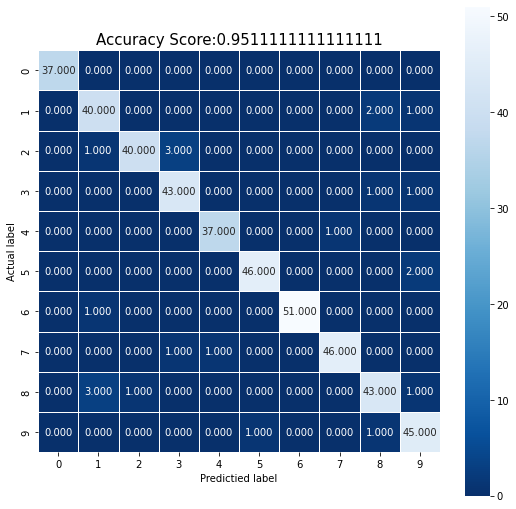

In [27]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predictied label');
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15);
plt.show();

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [2]:
X= pd.read_csv('./dl_pytorch/chap03/data/credit card.csv')
X = X.drop('CUST_ID',axis=1) ## axis=1 -> 열 단위 삭제, CUST_ID 열을 삭제하라는 의미다
X.fillna(method='ffill',inplace=True) # 결측 값을 앞의 값으로 채울 때 사용함
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679975
1 -0.519099  0.544831
2  0.330633  0.268881
3 -0.481656 -0.097616
4 -0.563512 -0.482504


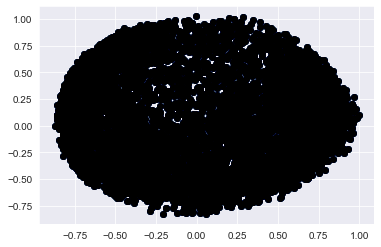

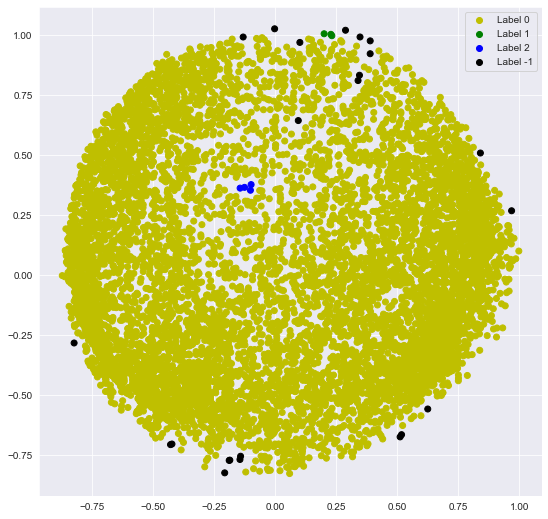

In [5]:
db_default = DBSCAN(eps=0.0375,min_samples=3).fit(X_principal)
labels = db_default.labels_

colors={}
colors[0]='y'
colors[1]='g'
colors[2]='b'
colors[-1]='k'

cvec=[colors[label] for label in labels]
r=plt.scatter(X_principal['P1'],X_principal['P2'],color='y')
g=plt.scatter(X_principal['P1'],X_principal['P2'],color='g')
b=plt.scatter(X_principal['P1'],X_principal['P2'],color='b')
k=plt.scatter(X_principal['P1'],X_principal['P2'],color='k')

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'],X_principal['P2'],c=cvec)
plt.legend((r,g,b,k),('Label 0','Label 1','Label 2', 'Label -1'))
plt.show()

In [6]:
print(X_principal.shape)

(8950, 2)
